In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset_path = './dataset/1'
dataset_version = '1.2.11'
limit_image = 5

#### Import images

In [11]:
def get_images(path_images, limit=None):
    all_images = os.listdir(path_images)
    if limit is None or limit > len(all_images):
        limit = len(all_images)
        
    x = []
    for i in range(limit):
        pil_image = tf.gfile.GFile(f'{path_images}/{all_images[i]}', 'rb').read()
        x.append(pil_image)

    return x

images = get_images('dataset/1/1.2.11/', limit=limit_image)

#### import labels

In [3]:
headers = ['Track ID', 'xmin', 'ymin', 'xmax', 'ymax', 'frame', 'lost', 'occluded', 'generated', 'label', ' actions']

#### Draw bounding boxes

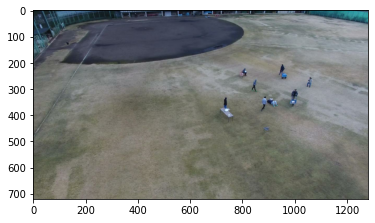

In [13]:
first_box = labels_df.iloc[0]
position_box = np.array([first_box.ymin/3, first_box.xmin/3, first_box.ymax/3, first_box.xmax/3])
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])

first_image = tf.image.decode_jpeg(images[0])
first_image = tf.image.convert_image_dtype(first_image, tf.float32)
first_image = tf.expand_dims(first_image, 0)

image_with_box = tf.image.draw_bounding_boxes(first_image, position_box.reshape([1, 1, 4]), colors=colors)
image_with_box = tf.squeeze(image_with_box)
image_with_box = tf.image.convert_image_dtype(image_with_box, tf.uint8)

with tf.Session() as sess:
    plt.imshow(image_with_box.eval())
    plt.show()
    

#### Video

In [3]:
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
resolution = (640, 360)

four_cc = cv2.VideoWriter_fourcc(*'MP4V')
video_out = cv2.VideoWriter('output2.mp4', four_cc, 29.9, resolution)

def write_boxes(path_video, path_label):
    labels_df = pd.read_csv(path_label, delimiter=' ', names=headers)
    counter = 0 

    video_cap = cv2.VideoCapture(path_video)

    while True:
        success, image = video_cap.read()
        if not success:
            break
        
        frame_boxes = labels_df.loc[labels_df.frame == counter]
        
        for _, box in frame_boxes.iterrows():
            image = cv2.rectangle(image, (box.xmin, box.ymin), (box.xmax, box.ymax), [255,0,0], 10)
        
        image = cv2.resize(image, resolution)
        video_out.write(image)
        counter += 1
            

In [7]:
videos = [['dataset/2.2.9.mp4', 'dataset/2.2.9.txt'], ['dataset/2.2.2.mp4', 'dataset/2.2.2.txt'],
          ['dataset/2.1.4.mp4', 'dataset/2.1.4.txt']]

for v in videos:
    write_boxes(v[0], v[1])
    
video_out.release()

## Video extraction

In [4]:
counter = 0
video_cap = cv2.VideoCapture('dataset/videos/2.2.9.mp4')
resolution = (640, 480)

while True:
    success, image = video_cap.read()
    
    if not success:
        break
    image = cv2.resize(image, resolution)
    cv2.imwrite(f'darkflow/dataset-2.2.9/frames/{counter}.jpg', image)
    counter += 1